# Figure 2 (Bar Plot) in DOCPLEX

In [7]:
import numpy as np
import pandas as pd
from docplex.cp.model import *
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [8]:
taxi=pd.read_csv("2018_Yellow_Taxi_Trip_Data.csv",nrows =50)
taxi=taxi[["tpep_pickup_datetime","tpep_dropoff_datetime","trip_distance"]]
taxi["tpep_pickup_datetime"]=pd.to_datetime(taxi["tpep_pickup_datetime"])
taxi["tpep_dropoff_datetime"]=pd.to_datetime(taxi["tpep_dropoff_datetime"])
taxi=taxi.sort_values(by ="tpep_pickup_datetime")
taxi.index=[*range(taxi.shape[0])]

pay=taxi['trip_distance'].tolist()

# Define natural formulations:
Intra5 + Inter1: cplexF1_a5e1
Intra5 + Inter2: cplexF1_a5e2
Intra5 + Inter3: cplexF1_a5e3
Sühr et al. 2019:cplexF1_a5e0

In [3]:
# natural formulation Intra5 + Inter3
def cplexF1_a5e3( icount,jcount ):
    
    male=range(0,jcount,2)
    female=range(1,jcount,2)

    mu1=10
    mu2=10

    lam1=0.5
    lam2=0.5
    lam3=0

    dis=np.random.rand(icount,jcount)

    mdl = CpoModel('F1')
    M=integer_var_list(icount*jcount, 0, 1, "M") #integer_var_list()
    u=float_var_list(jcount,0, 3, 'u')

    l1=sum( mu2*sum(M[i*jcount+j]-1 for j in range(jcount))**2 for i in range(icount))
    l2=sum(mu1*(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) -u[j])**2 for j in range(jcount))

    intra5=sum( (1-(u[j]+0.01)/1.01)**2 for j in range(jcount))
    muf=sum( (u[j]+0.01)/1.01 for j in female)/len(female)
    mum=sum( (u[j]+0.01)/1.01 for j in male)/len(male)
    inter3=(mum-muf)**2
    CustCare=sum(M[i*jcount+j]*dis[i,j] for i in range(icount) for j in range(jcount))

    obj=lam1*intra5+lam2*inter3+lam3*CustCare

    for j in range(jcount):
        mdl.add(1-sum(M[i*jcount+j] for i in range(icount)) >= 0)
        mdl.add(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) == u[j])

    for i in range(icount):
        mdl.add(sum(M[i*jcount+j] for j in range(jcount))==1)

    #for j in range(jcount):
    #    for i in range(icount):
    #        mdl.add(M[i*jcount+j]*(M[i*jcount+j]-1)==0)

    #.mdl.add(minimize(obj))
    #mdl.add(mdl.minimize_static_lex(obj))
    mdl.minimize(obj)
    msol = mdl.solve() #msol = mdl.solve() #
    #msol.get_solve_status()
    #msol.get_solve_time()
    ulist=[]
    for j in range(jcount):
        ulist.append(msol.get_value(u[j]))
    
    return ulist, msol.get_solve_time()

In [5]:
# natural formulation Intra5 + Inter2
def cplexF1_a5e2( icount,jcount ):
    
    male=range(0,jcount,2)
    female=range(1,jcount,2)

    mu1=10
    mu2=10

    lam1=0.5
    lam2=0.5
    lam3=0

    dis=np.random.rand(icount,jcount)

    mdl = CpoModel('F1')
    M=integer_var_list(icount*jcount, 0, 1, "M")
    u=float_var_list(jcount,0, 3, 'u')

    l1=sum( mu2*sum(M[i*jcount+j]-1 for j in range(jcount))**2 for i in range(icount))
    l2=sum(mu1*(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) -u[j])**2 for j in range(jcount))

    intra5=sum( (1-(u[j]+0.01)/1.01)**2 for j in range(jcount))
    mut=sum( (u[j]+0.01)/1.01 for j in range(jcount))/jcount
    muf=sum( (u[j]+0.01)/1.01 for j in female)/len(female)
    mum=sum( (u[j]+0.01)/1.01 for j in male)/len(male)
    inter2=len(female)*log(mut/muf)+len(male)*log(mut/mum)
    CustCare=sum(M[i*jcount+j]*dis[i,j] for i in range(icount) for j in range(jcount))

    obj=lam1*intra5+lam2*inter2+lam3*CustCare

    for j in range(jcount):
        mdl.add(1-sum(M[i*jcount+j] for i in range(icount)) >= 0)
        mdl.add(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) == u[j])

    for i in range(icount):
        mdl.add(sum(M[i*jcount+j] for j in range(jcount))==1)

    #for j in range(jcount):
    #    for i in range(icount):
    #        mdl.add(M[i*jcount+j]*(M[i*jcount+j]-1)==0)

    #.mdl.add(minimize(obj))
    #mdl.add(mdl.minimize_static_lex(obj))
    mdl.minimize(obj)
    msol = mdl.solve() #msol = mdl.solve() #
    #msol.get_solve_status()
    #msol.get_solve_time()
    ulist=[]
    for j in range(jcount):
        ulist.append(msol.get_value(u[j]))
    
    return ulist, msol.get_solve_time()

In [7]:
# natural formulation Intra5 + Inter1
def cplexF1_a5e1( icount,jcount ):
    
    male=range(0,jcount,2)
    female=range(1,jcount,2)

    mu1=10
    mu2=10

    lam1=0.5
    lam2=0.5
    lam3=0

    dis=np.random.rand(icount,jcount)

    mdl = CpoModel('F1')
    M=integer_var_list(icount*jcount, 0, 1, "M")
    u=float_var_list(jcount,0, 3, 'u')

    l1=sum( mu2*sum(M[i*jcount+j]-1 for j in range(jcount))**2 for i in range(icount))
    l2=sum(mu1*(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) -u[j])**2 for j in range(jcount))

    intra5=sum( (1-(u[j]+0.01)/1.01)**2 for j in range(jcount))
    mut=sum( (u[j]+0.01)/1.01 for j in range(jcount))/jcount
    muf=sum( (u[j]+0.01)/1.01 for j in female)/len(female)
    mum=sum( (u[j]+0.01)/1.01 for j in male)/len(male)
    inter1=len(female)*(muf/mut)*log(muf/mut)+len(male)*(mum/mut)*log(mum/mut)
    CustCare=sum(M[i*jcount+j]*dis[i,j] for i in range(icount) for j in range(jcount))

    obj=lam1*intra5+lam2*inter1+lam3*CustCare

    for j in range(jcount):
        mdl.add(1-sum(M[i*jcount+j] for i in range(icount)) >= 0)
        mdl.add(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) == u[j])

    for i in range(icount):
        mdl.add(sum(M[i*jcount+j] for j in range(jcount))==1)

    #for j in range(jcount):
    #    for i in range(icount):
    #        mdl.add(M[i*jcount+j]*(M[i*jcount+j]-1)==0)

    #.mdl.add(minimize(obj))
    #mdl.add(mdl.minimize_static_lex(obj))
    mdl.minimize(obj)
    msol = mdl.solve() #msol = mdl.solve() #
    #msol.get_solve_status()
    #msol.get_solve_time()
    ulist=[]
    for j in range(jcount):
        ulist.append(msol.get_value(u[j]))
    
    return ulist, msol.get_solve_time()

In [6]:
# natural formulation Sühr et al. 2019
def cplexF1_a5e0( icount,jcount ):
    # kdd 
    male=range(0,jcount,2)
    female=range(1,jcount,2)

    mu1=10
    mu2=10

    lam1=0.5
    lam2=0.5
    lam3=0

    dis=np.random.rand(icount,jcount)

    mdl = CpoModel('F1')
    M=integer_var_list(icount*jcount, 0, 1, "M")
    u=float_var_list(jcount,0, 3, 'u')

    l1=sum( mu2*sum(M[i*jcount+j]-1 for j in range(jcount))**2 for i in range(icount))
    l2=sum(mu1*(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) -u[j])**2 for j in range(jcount))

    intra5=sum( (1-(u[j]+0.01)/1.01)**2 for j in range(jcount))
    inter0=0
    CustCare=sum(M[i*jcount+j]*dis[i,j] for i in range(icount) for j in range(jcount))

    obj=lam1*intra5+lam2*inter0+lam3*CustCare

    for j in range(jcount):
        mdl.add(1-sum(M[i*jcount+j] for i in range(icount)) >= 0)
        mdl.add(sum(M[i*jcount+j]*(pay[i]-dis[i,j]) for i in range(icount)) == u[j])

    for i in range(icount):
        mdl.add(sum(M[i*jcount+j] for j in range(jcount))==1)

    #for j in range(jcount):
    #    for i in range(icount):
    #        mdl.add(M[i*jcount+j]*(M[i*jcount+j]-1)==0)

    #.mdl.add(minimize(obj))
    #mdl.add(mdl.minimize_static_lex(obj))
    mdl.minimize(obj)
    msol = mdl.solve() #msol = mdl.solve() #
    #msol.get_solve_status()
    #msol.get_solve_time()
    ulist=[]
    for j in range(jcount):
        ulist.append(msol.get_value(u[j]))
    
    return ulist, msol.get_solve_time()

# Calculate indices:
Intra-Fair2 (GE1), 
Intra-Fair3 (GE0), 
Intra-Fair4 (Gini), 
Inter-Fair1, 
Inter-Fair2, 
Inter-Fair3

In [ ]:
def parityCal(u,jcount):
    
    male=range(0,len(u),2)
    female=range(1,len(u),2)

    mu1=10
    mu2=10
    
    mut=sum( (u[j]+0.01)/1.01 for j in range(jcount))/jcount
    muf=sum( (u[j]+0.01)/1.01 for j in female)/len(female)
    mum=sum( (u[j]+0.01)/1.01 for j in male)/len(male)
    
    intra2=sum( ((u[j]+0.01)/1.01/mut)*math.log((u[j]+0.01)/1.01/mut) for j in range(jcount))/jcount
    intra3=sum( math.log(1.01*mut/(u[j]+0.01)) for j in range(jcount) )/jcount
    intra4=sum( abs((u[j1]+0.01)/1.01 -(u[j2]+0.01)/1.01 ) for j1 in range(jcount)  for j2 in range(jcount) )/(2*mut*jcount**2)
    intra5=sum( abs(1-(u[j]+0.01)/1.01) for j in range(jcount))
    
    inter1=len(female)*(muf/mut)*math.log(muf/mut)+len(male)*(mum/mut)*math.log(mum/mut)
    inter2=len(female)*math.log(mut/muf)+len(male)*math.log(mut/mum)
    inter3=abs(mum-muf)
    
    return [intra2,intra3,intra4,intra5,inter1,inter2,inter3]
    #return [GE1,GE0,Gap1,Gap2,Gap3] #GE1,GE0,Gini,

# 30 Experiments 

In [17]:
repeat=30
t=5
ran=range(5,6)
inter_name=['Sühr et al. 2019','Intra 5 + Inter 1','Intra 5 + Inter 2','Intra 5 + Inter 3']
#ind_name=["GE1","GE0",'Gap1','Gap2','Gap3']
ind_name=['intra2','intra3','intra4','intra5','inter1','inter2','inter3']
parity=pd.DataFrame(columns=ind_name+['runtime','size','inter_num'])

#for t in ran:
for r in range(repeat):        
    u,runtime=cplexF1_a5e1(t,t)
    par=parityCal(u,t)
    parity=parity.append({'intra2': par[0],'intra3': par[1],'intra4': par[2],'intra5': par[3],'inter1': par[4],'inter2': par[5],'inter3': par[6],'runtime':runtime,'size':t,'inter_num':inter_name[1]}, ignore_index=True)

    u,runtime=cplexF1_a5e2(t,t)
    par=parityCal(u,t)
    parity=parity.append({'intra2': par[0],'intra3': par[1],'intra4': par[2],'intra5': par[3],'inter1': par[4],'inter2': par[5],'inter3': par[6],'runtime':runtime,'size':t,'inter_num':inter_name[2]}, ignore_index=True)

    u,runtime=cplexF1_a5e3(t,t)
    par=parityCal(u,t)
    parity=parity.append({'intra2': par[0],'intra3': par[1],'intra4': par[2],'intra5': par[3],'inter1': par[4],'inter2': par[5],'inter3': par[6],'runtime':runtime,'size':t,'inter_num':inter_name[3]}, ignore_index=True)

    u,runtime=cplexF1_a5e0(t,t)
    par=parityCal(u,t)
    parity=parity.append({'intra2': par[0],'intra3': par[1],'intra4': par[2],'intra5': par[3],'inter1': par[4],'inter2': par[5],'inter3': par[6],'runtime':runtime,'size':t,'inter_num':inter_name[0]}, ignore_index=True)

parity['size']=parity['size'].astype('int32')
#parity['inter_num']=parity['inter_num'].astype('int32')

parity.to_csv('parity_size5.csv',index=False)

#parity.groupby(['inter_num','size']).count()

# Bar plot

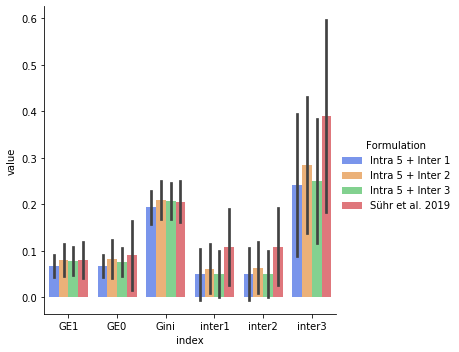

In [20]:
par_size5=pd.read_csv('parity_size5.csv',header=0)
#par_size5=parity[parity['size']==5]
par_size5=par_size5.drop(columns=['size', 'runtime','intra5'])
par_size5=pd.melt(par_size5,id_vars=['inter_num'],var_name='index',value_name='value')

par_size5=par_size5.rename(columns={'inter_num':'Formulation'})

par_size5=par_size5.replace('intra2', 'GE1')
par_size5=par_size5.replace('intra3', 'GE0')
par_size5=par_size5.replace('intra4', 'Gini')

#par_size5['Formulation']=par_size5['Formulation'].replace('inter 1 + intra 5','Intra 5 + Inter 1')
#par_size5['Formulation']=par_size5['Formulation'].replace('inter 2 + intra 5','Intra 5 + Inter 2')
#par_size5['Formulation']=par_size5['Formulation'].replace('inter 3 + intra 5','Intra 5 + Inter 3')

g = sns.catplot(
    data=par_size5, kind="bar",
    x='index', y='value', hue='Formulation',
    ci="sd", palette="bright", alpha=.6
)
#, height=6
plt.savefig('bar.pdf', bbox_inches = 'tight')